In [138]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','^','s','d']
colors=['red','blue','green','black']

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_read = pd.read_csv(mouse_drug_data)
clinical_read = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
mouse_clinical = pd.merge(clinical_read, mouse_read, on = "Mouse ID", how = "left")


# Display the data table for preview
mouse_clinical.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [139]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gpd_drg_tpt = mouse_clinical.groupby(["Drug","Timepoint"])
mean_tumor_vol = gpd_drg_tpt["Tumor Volume (mm3)"].mean()
mean_tumor_vol
# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame(mean_tumor_vol)
Finalmean_tumor_vol = mean_tumor_vol_df.reset_index()
# Preview DataFrame
Finalmean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [140]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol_df =  gpd_drg_tpt["Tumor Volume (mm3)"].sem()

# Preview DataFrame

# Convert to DataFrame
sem_tumor_vol_df = pd.DataFrame(sem_tumor_vol_df)
Final_sem_tumor_vol = sem_tumor_vol_df.reset_index()

# Preview DataFrame
Final_sem_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [141]:
# Minor Data Munging to Re-Format the Data Frames
reformat_tumor_mean = Finalmean_tumor_vol.pivot(index = "Timepoint", columns = "Drug", 
                                               values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
reformat_tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [142]:
# Minor Data Munging to Re-Format the Data Frames
reformat_sem_tumor = Final_sem_tumor_vol.pivot(index = "Timepoint", columns = "Drug", 
                                               values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
reformat_sem_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [143]:
reformat_tumor_mean.keys()
reformat_tumor_mean.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

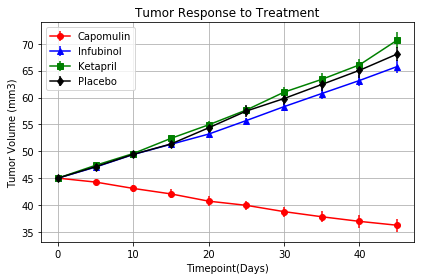

In [157]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
reformat_tumor_mean
reformat_sem_tumor 
reformat_tumor_mean.index

i = 0
for drug in drug_list:
    ax.errorbar(reformat_tumor_mean.index, reformat_tumor_mean[drug], 
                yerr = reformat_sem_tumor[drug], marker = markers[i], color = colors[i])
    i = i + 1
plt.legend(loc="best")

plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


# Save the Figure
plt.tight_layout()
plt.savefig("../Images/Tumor Response to Treatment.png")

In [145]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [146]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
gpd_metastasis = mouse_clinical.groupby(["Drug","Timepoint"])
metastasis_mean = gpd_metastasis["Metastatic Sites"].mean()

# Convert to DataFrame
metastasis_df = pd.DataFrame(metastasis_mean)
metastasis_df.head()
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [147]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
gpd_metastasis = mouse_clinical.groupby(["Drug","Timepoint"])
metastasis_sem = gpd_metastasis["Metastatic Sites"].sem()

# Convert to DataFrame
metastasis_sem_df = pd.DataFrame(metastasis_sem)
metastasis_sem_df.head()

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [148]:
# Minor Data Munging to Re-Format the Data Frames
Final_metastasis_mean = metastasis_df.reset_index().pivot(index = "Timepoint",columns="Drug", values="Metastatic Sites")
Final_metastasis_mean
# Preview that Reformatting worked


# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [149]:
Final_metastasis_sem = metastasis_sem_df.reset_index().pivot(index = "Timepoint",columns="Drug", values="Metastatic Sites")
Final_metastasis_sem


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


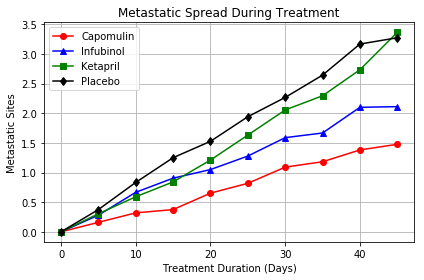

In [158]:
# Generate the Plot (with Error Bars)
fig, plt.subplots()
Final_metastasis_mean
Final_metastasis_sem
Final_metastasis_mean.index

i = 0
for drug in drug_list:
    ax.errorbar(Final_metastasis_mean.index, Final_metastasis_mean[drug], 
                yerr = Final_metastasis_sem[drug], marker = markers[i], color = colors[i])
    i+=1

i = 0
for drug in drug_list:
    plt.plot(Final_metastasis_mean.index, Final_metastasis_mean[drug], marker = markers[i], color=colors[i])
    i+=1
    
plt.legend(loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()


# Save the Figure
plt.tight_layout()
plt.savefig("../Images/Metastatic Spread During Treatment.png")

## Survival Rates

In [151]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
gpd_drg_tpt = mouse_clinical.groupby(["Drug","Timepoint"])
mice_count = gpd_drg_tpt["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
final_mice_count_df = mice_count_df.reset_index()
# Preview DataFrame
final_mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [152]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mice = final_mice_count_df.pivot(index = "Timepoint",
                                                        columns="Drug", values="Mouse ID")

# Preview the Data Frame
reformat_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [153]:
reformat_mice.max()

Drug
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     26
Ramicane     25
Stelasyn     26
Zoniferol    25
dtype: int64

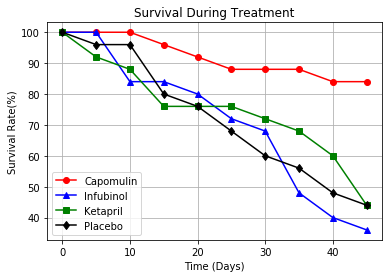

In [159]:
# Generate the Plot (Accounting for percentages)
fig, plt.subplots()
reformat_mice.index # x axis
reformat_mice #y axis

i = 0
for drug in drug_list:
    plt.plot(reformat_mice.index, (reformat_mice[drug]/reformat_mice[drug].max() * 100), 
             marker = markers[i], color = colors[i])
    i = i+1
    
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.grid()    

# Save the Figure
plt.savefig("../Images/Survival During Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [155]:
# Calculate the percent changes for each drug
percent_change = ((reformat_tumor_mean.loc[45]-reformat_tumor_mean.loc[0])/ 
                    reformat_tumor_mean.loc[0]) * 100
percent_change = round((percent_change),2)
percent_change
# Display the data to confirm


Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
(-19.48, 46.12, 57.03, 51.3)
[0 1 2 3]
(-19.48, 46.12, 57.03, 51.3)


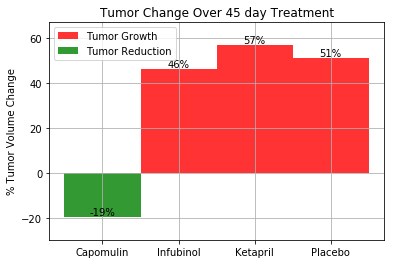

In [160]:
# Store all Relevant Percent Changes into a Tuple
drug_list_tuple = tuple(drug_list)
print(drug_list_tuple)
percent_change_tuple = tuple(percent_change[drug_list])
print(percent_change_tuple)
y_axis = np.arange(len(drug_list_tuple))
print(y_axis)
drug_activity = percent_change_tuple
print(drug_activity)

plt.ylim(min(percent_change_tuple)-10, max(percent_change_tuple)+10)

for drug in range(len(y_axis)):
    if drug_activity[drug] > 0:
        growth = plt.bar(y_axis[drug], drug_activity[drug], color="r", align='edge', alpha=0.8, width=1)
        plt.text(y_axis[drug]+0.5, drug_activity[drug], '%d' % int(drug_activity[drug])+'%', ha='center', va='bottom', color='black')
    else:
        reduction = plt.bar(y_axis[drug], drug_activity[drug], color="g", align='edge', alpha=0.8, width=1)
        plt.text(y_axis[drug]+0.5, drug_activity[drug], '%d' % int(drug_activity[drug])+'%', ha='center', va='bottom', color='black')

plt.grid()        
plt.xticks(y_axis+0.5, drug_list_tuple)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 day Treatment')
plt.legend((growth, reduction), ('Tumor Growth', 'Tumor Reduction'), loc="upper left")
plt.savefig("../Images/Tumor Change Over 45 day Treatment.png")

# Show the Figure
fig.show()